In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from petitRADTRANS import Radtrans
from petitRADTRANS.retrieval import Retrieval, RetrievalConfig
from petitRADTRANS.retrieval.models import *
from petitRADTRANS.retrieval.chemistry import get_abundances
from petitRADTRANS.retrieval.parameter import Parameter
import petitRADTRANS.retrieval.cloud_cond as cc
from petitRADTRANS.retrieval.util import *
from petitRADTRANS.retrieval import plot_style as ps
import scicomap as sc
import pandas as pd
import copy as cp
from glob import glob
from astropy.io import fits
import json

Using pRT Plotting style!


In [27]:
sphere = fits.open("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits")
vwlen,vflux,verr,*_ = np.genfromtxt("VHS1256b_V2.txt",unpack=True,delimiter = ',')    
crires = np.genfromtxt("HR8799b_CRIRES.dat").T


(2, 88574)


/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_74028/898279483.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/ESOPropRes.pdf",bbox_inches='tight')
/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_74028/898279483.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/ESOPropRes.pdf",bbox_inches='tight')
/Users/nasedkin/anaconda3/envs/pRTUpdate/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


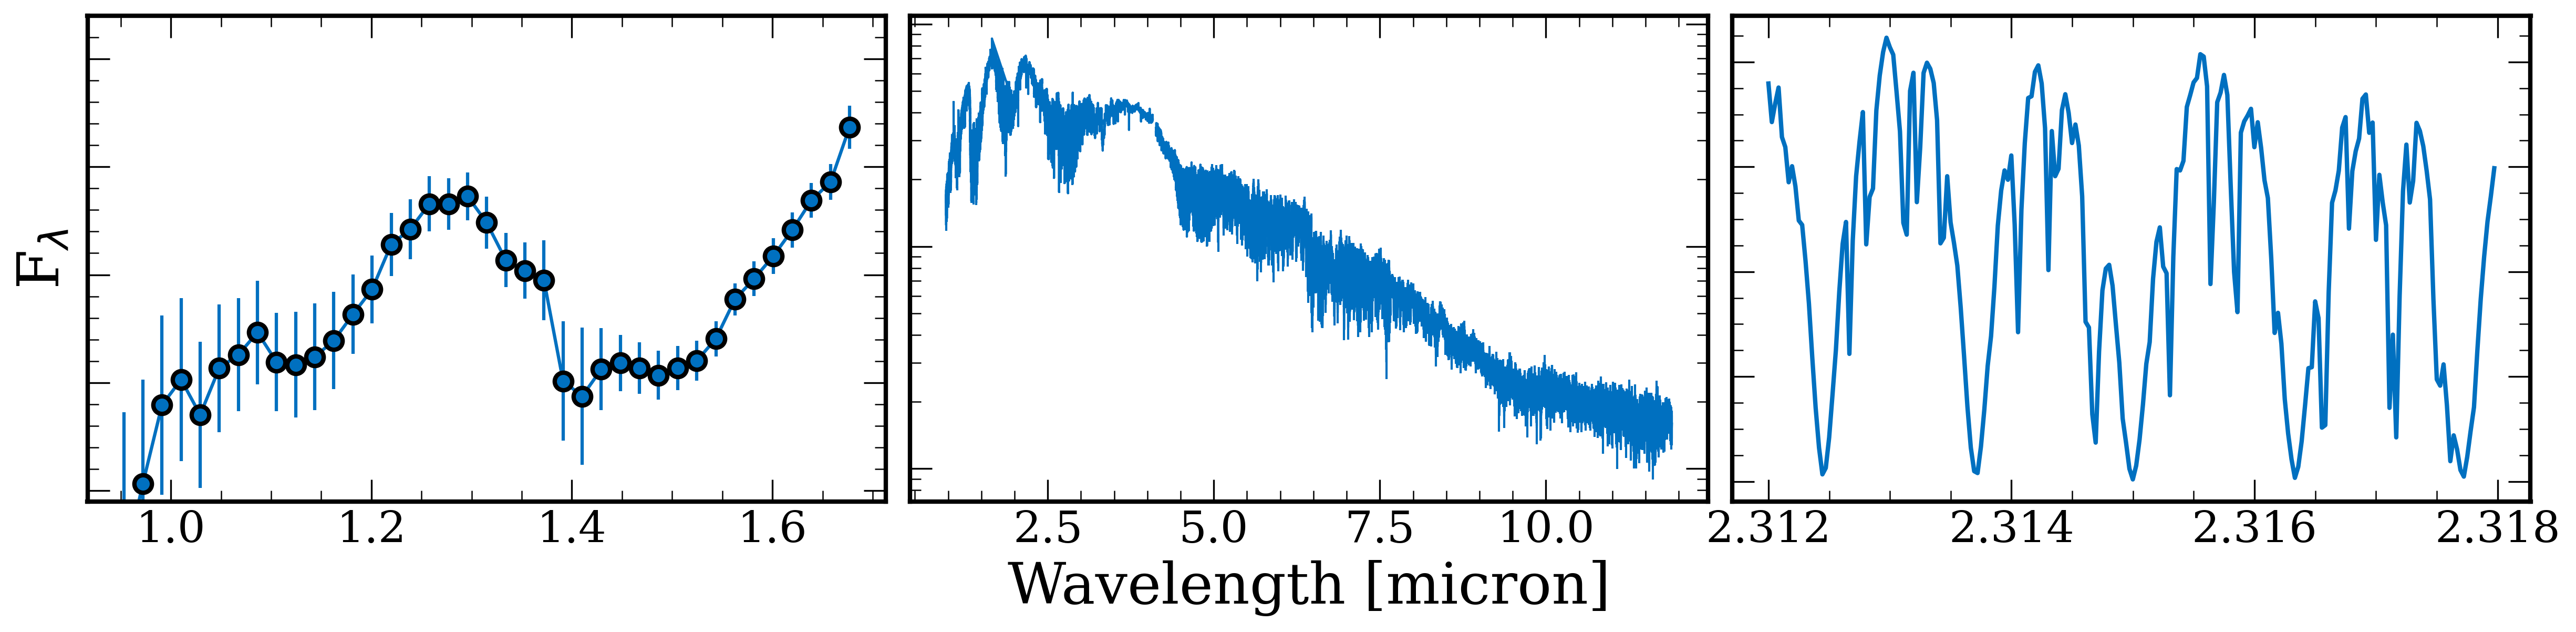

In [52]:
fig, ax = plt.subplots(ncols=3,figsize = (20,4), gridspec_kw={"wspace":0.03})
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[0].set_ylabel(r"F$_{\lambda}$")
ax[1].set_xlabel("Wavelength [micron]")
cwlen = crires[0]*1e6
ax[0].errorbar(sphere["SPECTRUM"].data["WAVELENGTH"],
               sphere["SPECTRUM"].data["FLUX"], 
               yerr=np.sqrt(np.diag(sphere["SPECTRUM"].data["COVARIANCE"])),
               marker = 'o',
               color = "#0070C0",
               markeredgewidth=2)
ax[0].set_ylim(-1e-16,4.4e-15)
inds = np.where(vwlen<11.9)
ax[1].errorbar(vwlen[inds],
               vflux[inds], 
               yerr=verr[inds],
               linewidth = 1,
               color = "#0070C0")
ax[1].set_yscale('log')
ax[1].set_yticklabels([])
inds = np.where((cwlen>2.312) &(cwlen<2.318))
ax[2].plot(cwlen[inds], crires[1][inds],
               color = "#0070C0",
               linewidth = 2)
plt.savefig("plots/ESOPropRes.pdf",bbox_inches='tight')